In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
train=pd.read_csv('maths_marks.csv',nrows=149)
train

,ExtM1,SessM1,totalM1,gradeM1,ExtM2,SeddM2,totalM2,gradeM2,ExternalM3,SessM3,totalM3,gradeM3
0,50,33,83,1,52,32,84,1,48,22,70,2
1,45,31,76,1,42,32,74,2,32,20,52,4
2,55,35,90,0,53,36,89,0,50,31,81,1
3,58,37,95,0,51,35,86,0,36,20,56,3
4,42,27,69,2,43,23,66,2,52,20,72,2
5,48,32,80,1,52,29,81,1,44,23,67,2
6,53,31,84,1,40,28,68,2,41,21,62,3
7,39,30,69,2,44,28,72,2,40,15,55,3
8,42,34,76,1,35,19,54,4,35,24,59,3
9,28,16,44,5,49,36,85,0,40,27,67,2


In [3]:
tar=train['gradeM3']

tar

0      2
1      4
2      1
3      3
4      2
5      2
6      3
7      3
8      3
9      2
10     5
11     2
12     0
13     4
14     4
15     6
16     2
17     3
18     6
19     4
20     4
21     4
22     3
23     2
24     4
25     4
26     1
27     3
28     2
29     1
      ..
119    6
120    6
121    3
122    6
123    6
124    5
125    5
126    4
127    6
128    4
129    6
130    6
131    6
132    6
133    5
134    3
135    5
136    6
137    6
138    5
139    5
140    6
141    6
142    6
143    5
144    6
145    4
146    6
147    6
148    5
Name: gradeM3, Length: 149, dtype: int64

In [4]:

train.drop({'ExternalM3','SessM3','totalM3','gradeM3'}, axis=1, inplace=True)
train

,ExtM1,SessM1,totalM1,gradeM1,ExtM2,SeddM2,totalM2,gradeM2
0,50,33,83,1,52,32,84,1
1,45,31,76,1,42,32,74,2
2,55,35,90,0,53,36,89,0
3,58,37,95,0,51,35,86,0
4,42,27,69,2,43,23,66,2
5,48,32,80,1,52,29,81,1
6,53,31,84,1,40,28,68,2
7,39,30,69,2,44,28,72,2
8,42,34,76,1,35,19,54,4
9,28,16,44,5,49,36,85,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     train, tar, test_size=0.33, random_state=42,shuffle=True)

In [6]:
y_test

73     0
18     6
117    6
78     4
76     3
31     2
64     2
140    6
68     1
82     4
109    1
12     0
36     1
9      2
19     4
56     5
136    6
69     2
55     3
131    6
29     1
123    6
26     1
127    6
128    4
144    6
110    2
101    4
45     5
30     1
22     3
15     6
65     0
11     2
42     2
105    6
51     4
27     3
4      2
32     4
120    6
85     1
86     2
16     2
10     5
81     3
132    6
142    6
75     5
108    1
Name: gradeM3, dtype: int64

In [14]:
rf = RandomForestClassifier(n_estimators = 500, verbose = 10, n_jobs = -1)
rf.fit(X_train,y_train)

building tree 1 of 500building tree 2 of 500building tree 3 of 500building tree 4 of 500building tree 5 of 500


building tree 6 of 500building tree 7 of 500


building tree 8 of 500

building tree 9 of 500building tree 10 of 500
building tree 11 of 500

building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500building tree 20 of 500building tree 21 of 500
building tree 22 of 500


building tree 23 of 500
building tree 24 of 500
building tree 25 of 500building tree 26 of 500
building tree 27 of 500

building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500building tree 32 of 500

building tree 33 of 500
building tree 34 of 500building tree 35 of 500

building tree 36 of 500
building tree 37 of 500building tree 38 of 500
building tree 39 of 500

building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.2s



building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500building tree 120 of 500

building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500building tree 127 of 500

building tree 128 of 500
building tree 129 of 500
building tree 130 of 500building tree 131 of 500

building tree 132 of 500building tree 133 of 500
building tree 134 of 500

building tree 135 of 500building tree 136 of 500

building tree 137 of 500
building tree 138 of 500
building tree 139 of 500building tree 140 of 500building tree 141 of 500

building tree 142 of 500

building tree 143 of 500
building tree 144 of 500building tree 145 of 500

building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500building tree 153 of 500building tree 154 of 500

building tree 155 of 500


[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    0.4s


building tree 274 of 500
building tree 275 of 500building tree 276 of 500building tree 277 of 500building tree 278 of 500


building tree 279 of 500building tree 280 of 500


building tree 281 of 500
building tree 282 of 500
building tree 283 of 500building tree 284 of 500building tree 285 of 500

building tree 286 of 500

building tree 287 of 500
building tree 288 of 500building tree 289 of 500

building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500building tree 301 of 500
building tree 302 of 500

building tree 303 of 500
building tree 304 of 500
building tree 305 of 500building tree 306 of 500

building tree 307 of 500
building tree 308 of 500building tree 309 of 500

building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500


[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s


building tree 416 of 500building tree 417 of 500

building tree 418 of 500
building tree 419 of 500building tree 420 of 500
building tree 421 of 500

building tree 422 of 500
building tree 423 of 500building tree 424 of 500building tree 425 of 500

building tree 426 of 500

building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500building tree 435 of 500
building tree 436 of 500

building tree 437 of 500
building tree 438 of 500
building tree 439 of 500building tree 440 of 500

building tree 441 of 500building tree 442 of 500

building tree 443 of 500
building tree 444 of 500building tree 445 of 500

building tree 446 of 500
building tree 447 of 500
building tree 448 of 500building tree 449 of 500

building tree 450 of 500
building tree 451 of 500
building tree 452 of 500building tree 453 of 500

building tree 454 of 500building tree 455 of 500



[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=10,
            warm_start=False)

In [16]:
rf.score(X_test,y_test)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

0.2

In [23]:
filename = 'finalized_model2_Maths.sav'
pickle.dump(rf, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))

In [29]:
X_test=np,array([50.0,33,83,1,52,32,84,1])
single_test=np.asarray(X_test)

NameError: name 'array' is not defined

In [28]:
pkp=loaded_model.predict()

ValueError: Expected 2D array, got 1D array instead:
array=[50. 33. 83.  1. 52. 32. 84.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [142]:
pkp

array([3, 4, 3, 5, 6, 4, 2, 4, 4, 6, 4, 5, 1, 1, 3, 4, 1, 5, 5, 2, 2, 6,
       3, 5, 5, 6, 4, 3, 3, 3, 3, 4, 3, 3, 5, 5, 2, 3, 4, 2, 6, 5, 5, 3,
       5, 1, 5, 6, 6, 2], dtype=int64)

In [28]:
 from sklearn.neural_network import MLPClassifier
 clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

 clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
clf.score(X_test,y_test)

0.14

In [47]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train) 
neigh.score(X_test,y_test)



0.18

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, X_test, y_test, cv=10)

c:\users\parashar parikh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


NameError: name 'predict' is not defined

In [10]:
rf.feature_importances_

array([0.13445696, 0.14075287, 0.14755551, 0.06516829, 0.14125606,
       0.15499368, 0.14333674, 0.07247988])

In [144]:
feature_list = list(train.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: totalM2              Importance: 0.16
Variable: totalM1              Importance: 0.15
Variable: ExtM2                Importance: 0.15
Variable: ExtM1                Importance: 0.14
Variable: SessM1               Importance: 0.14
Variable: SeddM2               Importance: 0.14
Variable: gradeM1              Importance: 0.07
Variable: gradeM2              Importance: 0.07


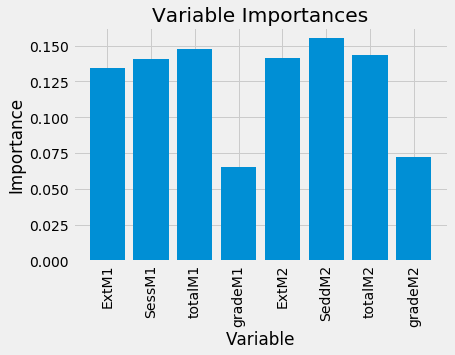

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [21]:
pkp= rf.predict(X_test)

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [20]:
X_test.index


Int64Index([ 73,  18, 117,  78,  76,  31,  64, 140,  68,  82, 109,  12,  36,
              9,  19,  56, 136,  69,  55, 131,  29, 123,  26, 127, 128, 144,
            110, 101,  45,  30,  22,  15,  65,  11,  42, 105,  51,  27,   4,
             32, 120,  85,  86,  16,  10,  81, 132, 142,  75, 108],
           dtype='int64')

In [22]:
pkp

array([3, 4, 3, 5, 6, 4, 4, 5, 4, 6, 3, 5, 1, 1, 3, 4, 1, 5, 2, 2, 2, 6,
       3, 5, 5, 6, 3, 3, 3, 3, 1, 4, 3, 4, 6, 5, 2, 3, 3, 4, 6, 5, 5, 3,
       5, 1, 5, 6, 3, 2], dtype=int64)

In [77]:
import dash
from dash.dependencies import Input, Output
import dash_html_components as html
import dash_core_components as dcc
from collections import defaultdict
import pandas as pd
import sys

app = dash.Dash()
app.config.suppress_callback_exceptions=True
df = pd.read_csv(‘https://gist.githubusercontent.com/jbrav/f281e0063418dd62ad63004671cf96ec/raw/86ca0f728bdcd0a10db99d81a7949374acba7c35/coma.csv 23’)
print df
available_funds = df[‘FUNDS’].unique()

app.layout = html.Div([
html.Div([
html.Div([
html.H1(‘Evolucion rentabilidades’),
dcc.Dropdown(
id=‘mydropdown0’,
options= [
{‘label’: ‘SCHRODER’, ‘value’: ‘SCHRODER’},
{‘label’: ‘OPM’, ‘value’: ‘OPM’},
{‘label’: ‘MSF’, ‘value’: ‘MSF’}
],
value=‘MSF’,
multi=True),
dcc.Graph(id=‘graph0’),
]),
html.Div([
html.H1(‘Evolucion volatilidades’),
dcc.Dropdown(
id=‘mydropdown2’,
options= [
{‘label’: ‘MUM’, ‘value’: ‘MUM’},
{‘label’: ‘MAM’, ‘value’: ‘MAM’},
{‘label’: ‘MOM’, ‘value’: ‘MOM’},
],
value=‘MUM’,
multi=True),
dcc.Graph(id=‘graph2’)
]),

    html.Div([
        html.H1('Ejemplo regresion'),
        dcc.Dropdown(
            id='mydropdown3',
            options= [
               {'label': 'CLEP', 'value': 'CLEP'},
               {'label': 'CLAP', 'value': 'CLAP'},
               {'label': 'CLOP', 'value': 'CLOP'},
            ],
            value='CLEP',
            multi=True),
        dcc.Graph(
            id='graph3')
    ]),
])])
@app.callback(
Output(‘graph0’,‘figure’), [Input(‘mydropdown0’, ‘value’)])
def update_graph0(selected_values):

odf = df.ix[df['FUNDS'] == selected_values]
return {
    'data': [{
        'x': odf.YEAR,
        'y': odf.QUANTITY
         
    }]
}
@app.callback(
Output(‘graph2’,‘figure’), [Input(‘mydropdown2’, ‘value’)])
def update_graph2(selected_dropdown_value):
odf = df.ix[df[‘FUNDS’] == selected_dropdown_value]
return {
‘data’: [{
‘x’: odf.YEAR,
‘y’: odf.QUANTITY
}]
}

@app.callback(
Output(‘graph3’,‘figure’), [Input(‘mydropdown3’, ‘value’)])
def update_graph3(selected_dropdown_value):
odf = df.ix[df[‘FUNDS’] == selected_dropdown_value]

return {
    'data': [{
        'x': odf['YEAR'],
        'y': odf['QUANTITY']
    }]
}
app.css.append_css({
“external_url”: “https://codepen.io/chriddyp/pen/bWLwgP.css 9”})

if name == ‘main’:
app.run_server(debug=True, port= 1000)

SyntaxError: invalid character in identifier (<ipython-input-77-0b660e510492>, line 11)

In [8]:
import plotly.plotly as py
import plotly.tools as tls
py.tools.set_credentials_file(username='parasharparikh18', api_key='••••••••••')
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [3,4,8,6]

plt.plot(x, 'o')
plt.plot(y)
fig = plt.gcf()

plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig, filename = 'mpl-scatter-line')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [143]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
# Create random data with numpy
import numpy as np
tls.set_credentials_file(username='parasharparikh18', api_key='fkEwbX143aiE1xsapg2E')
#X_test.sort()
X_test=([ 73,  18, 117,  78,  76,  31,  64, 140,  68,  82, 109,  12,  36,
              9,  19,  56, 136,  69,  55, 131,  29, 123,  26, 127, 128, 144,
            110, 101,  45,  30,  22,  15,  65,  11,  42, 105,  51,  27,   4,
             32, 120,  85,  86,  16,  10,  81, 132, 142,  75, 108])


# Create a trace
trace = go.Scatter(
    x = X_test.sort(),
    y = pkp,
    name='predicted',
    hovertext="predicted",
    mode = 'lines'
    
)
trace1 = go.Scatter(
    x = X_test.sort(),
    y = y_test,
    name='original',
    hovertext="original",
    mode = 'lines'
)

data = [trace1,trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

